<a href="https://colab.research.google.com/github/Divyam-Deep/F1-Race-EDA/blob/main/F1_race_EDA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cleaning and Preparing F1-Race Data Sets

In [ ]:
#impoarting all the datas from the kaggle to colab without downloading
import pandas as pd
import os
import kagglehub

# importing the dataset from Kaggle
path = kagglehub.dataset_download("cjgdev/formula-1-race-data-19502017")

# loading the csv's
circuits = pd.read_csv(os.path.join(path, "circuits.csv"),encoding='ISO-8859-1')
constructor_results = pd.read_csv(os.path.join(path, "constructorResults.csv"),encoding='ISO-8859-1')
constructor_standings = pd.read_csv(os.path.join(path, "constructorStandings.csv"),encoding='ISO-8859-1')
constructors = pd.read_csv(os.path.join(path, "constructors.csv"),encoding='ISO-8859-1')
driver_standings = pd.read_csv(os.path.join(path, "driverStandings.csv"),encoding='ISO-8859-1')
drivers = pd.read_csv(os.path.join(path, "drivers.csv"),encoding='ISO-8859-1')
lap_times = pd.read_csv(os.path.join(path, "lapTimes.csv"))
pit_stops = pd.read_csv(os.path.join(path, "pitStops.csv"))
qualifying = pd.read_csv(os.path.join(path, "qualifying.csv"))
races = pd.read_csv(os.path.join(path, "races.csv"))
results = pd.read_csv(os.path.join(path, "results.csv"))
seasons = pd.read_csv(os.path.join(path, "seasons.csv"))
status = pd.read_csv(os.path.join(path, "status.csv"))

100%|██████████| 4.58M/4.58M [00:00<00:00, 57.6MB/s]

Extracting files...


##cleaning on circuits data

In [ ]:
circuits.head() #imported successfully

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


In [ ]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [ ]:
###Checking the null values on each data
circuits.isnull().sum()

,0
circuitId,0
circuitRef,0
name,0
location,0
country,0
lat,0
lng,0
url,0


In [ ]:
circuits.shape

(73, 9)

In [ ]:
#as there is 73 total rows and 9 columns and the alt column have only one data and reaming are nulls so it better remove that attribute from the data
circuits = circuits.drop(columns= "alt")

In [ ]:
circuits.isnull().sum() #no null values

,0
circuitId,0
circuitRef,0
name,0
location,0
country,0
lat,0
lng,0
url,0


In [ ]:
###checking for duplicates
circuits.duplicated().sum() #no duplicated values

np.int64(0)

In [ ]:
###checking for datatypes
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   73 non-null     int64  
 1   circuitRef  73 non-null     object 
 2   name        73 non-null     object 
 3   location    73 non-null     object 
 4   country     73 non-null     object 
 5   lat         73 non-null     float64
 6   lng         73 non-null     float64
 7   url         73 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.7+ KB


In [ ]:
circuits.country.unique()

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'Austria', 'UAE',
       'Argentina', 'Portugal', 'South Africa', 'Mexico', 'Korea',
       'Netherlands', 'Sweden', 'Morocco', 'Switzerland', 'India',
       'Russia', 'Azerbaijan'], dtype=object)

In [ ]:
###triming any extra sapce or any thing in all objects datatype attributes
circuits[['circuitRef','name','location','country','url']] = circuits[['circuitRef','name','location','country','url']].apply(lambda x : x.str.strip())

In [ ]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,http://en.wikipedia.org/wiki/Istanbul_Park


##working on the constructor result

In [ ]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [ ]:
constructor_results.isnull().sum()

,0
constructorResultsId,0
raceId,0
constructorId,0
points,0
status,11125


In [ ]:
constructor_results.shape

(11142, 5)

In [ ]:
#we can see that out of 11142 we have 11125 null values in status column so its better to remove this
constructor_results.drop(columns="status", inplace=True)

In [ ]:
constructor_results.isnull().sum()

,0
constructorResultsId,0
raceId,0
constructorId,0
points,0


In [ ]:
constructor_results.shape

(11142, 4)

In [ ]:
constructor_results.info() #correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11142 non-null  int64  
 1   raceId                11142 non-null  int64  
 2   constructorId         11142 non-null  int64  
 3   points                11142 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 348.3 KB


In [ ]:
constructor_results.duplicated().sum()#no duplicates

np.int64(0)

## cleaning the constructor_standings

In [ ]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Unnamed: 7
0,1,18,1,14.0,1,1,1,NaN
1,2,18,2,8.0,3,3,0,NaN
2,3,18,3,9.0,2,2,0,NaN
3,4,18,4,5.0,4,4,0,NaN
4,5,18,5,2.0,5,5,0,NaN


In [ ]:
constructor_standings.isnull().sum()

,0
constructorStandingsId,0
raceId,0
constructorId,0
points,0
position,0
positionText,0
wins,0
Unnamed: 7,11896


In [ ]:
constructor_standings.shape

(11896, 8)

In [ ]:
constructor_standings.drop(columns="Unnamed: 7", inplace=True)

In [ ]:
constructor_standings.isnull().sum()

,0
constructorStandingsId,0
raceId,0
constructorId,0
points,0
position,0
positionText,0
wins,0


In [ ]:
constructor_standings.shape

(11896, 7)

In [ ]:
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11896 entries, 0 to 11895
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  11896 non-null  int64  
 1   raceId                  11896 non-null  int64  
 2   constructorId           11896 non-null  int64  
 3   points                  11896 non-null  float64
 4   position                11896 non-null  int64  
 5   positionText            11896 non-null  object 
 6   wins                    11896 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 650.7+ KB


In [ ]:
if (constructor_standings['positionText'] == constructor_standings['position']).all():
    print("both are same")
else:
    print("not same")


not same


In [ ]:
constructor_standings['positionText'].unique() #because of E the datatype is object it might be error

array(['1', '3', '2', '4', '5', '6', '8', '7', '9', '10', '11', 'E', '12',
       '13', '14', '15', '18', '17', '16', '19', '20', '21', '22'],
      dtype=object)

In [ ]:
constructor_standings.position.unique()

array([ 1,  3,  2,  4,  5,  6,  8,  7,  9, 10, 11, 12, 13, 14, 15, 18, 17,
       16, 19, 20, 21, 22])

##cleaning constructors

In [ ]:
constructors.head(5)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [ ]:
constructors.isnull().sum()

,0
constructorId,0
constructorRef,0
name,0
nationality,0
url,0
Unnamed: 5,208


In [ ]:
constructors.shape

(208, 6)

In [ ]:
constructors.drop(columns="Unnamed: 5", inplace= True)

In [ ]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
203,206,marussia,Marussia,Russian,http://en.wikipedia.org/wiki/Marussia_F1
204,207,caterham,Caterham,Malaysian,http://en.wikipedia.org/wiki/Caterham_F1
205,208,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport


In [ ]:
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   208 non-null    int64 
 1   constructorRef  208 non-null    object
 2   name            208 non-null    object
 3   nationality     208 non-null    object
 4   url             208 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.3+ KB


In [ ]:
constructors[['constructorRef','name','nationality','url']] = constructors[['constructorRef','name','nationality','url']].apply(lambda x : x.str.strip())  # removing any unwanted spaces from these attributes

In [ ]:
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   208 non-null    int64 
 1   constructorRef  208 non-null    object
 2   name            208 non-null    object
 3   nationality     208 non-null    object
 4   url             208 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.3+ KB


In [ ]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


##cleaning driver_standings

In [ ]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [ ]:
driver_standings.isnull().sum()

,0
driverStandingsId,0
raceId,0
driverId,0
points,0
position,0
positionText,0
wins,0


In [ ]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31726 entries, 0 to 31725
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  31726 non-null  int64  
 1   raceId             31726 non-null  int64  
 2   driverId           31726 non-null  int64  
 3   points             31726 non-null  float64
 4   position           31726 non-null  int64  
 5   positionText       31726 non-null  object 
 6   wins               31726 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
driver_standings.positionText.unique() #because of d the whoe attributes become object datatype

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '27', '26', 'D', '28', '29', '30', '31', '33', '32',
       '34', '36', '35', '38', '39', '37', '45', '41', '46', '42', '40',
       '43', '44', '47', '49', '48', '51', '50', '52', '53', '55', '54',
       '57', '56', '58', '59', '61', '60', '62', '66', '65', '63', '64',
       '69', '68', '67', '73', '72', '71', '70', '75', '74', '77', '76',
       '78', '83', '81', '80', '88', '87', '84', '82', '86', '85', '79',
       '91', '90', '89', '92', '93', '94', '95', '96', '97', '98', '103',
       '102', '101', '99', '100', '104', '108', '107', '105', '106'],
      dtype=object)

## cleaning drivers

In [ ]:
drivers.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
drivers.isnull().sum()

,0
driverId,0
driverRef,0
number,804
code,757
forename,0
surname,0
dob,1
nationality,0
url,1


In [ ]:
drivers.shape

(842, 9)

In [ ]:
757/842 #as number and code both have 90% values as null so remove this will be better

0.8990498812351544

In [ ]:
drivers.drop(columns=["number", "code"],inplace=True)

In [ ]:
drivers

,driverId,driverRef,forename,surname,dob,nationality,url
0,1,hamilton,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...
837,838,vandoorne,Stoffel,Vandoorne,26/03/1992,Belgian,http://en.wikipedia.org/wiki/Stoffel_Vandoorne
838,839,ocon,Esteban,Ocon,17/09/1996,French,http://en.wikipedia.org/wiki/Esteban_Ocon
839,840,stroll,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
840,841,giovinazzi,Antonio,Giovinazzi,14/12/1993,Italian,http://en.wikipedia.org/wiki/Antonio_Giovinazzi


In [ ]:
drivers['dob'] = drivers['dob'].fillna(drivers['dob'].mode()[0])  #in this i have used the mode function as the most popular dob will be a good option rather than mean or median

In [ ]:
drivers['url'] = drivers['url'].fillna("no links available")  #for the url the best way to fill is by puting some values in it

In [ ]:
drivers.isnull().sum()

,0
driverId,0
driverRef,0
forename,0
surname,0
dob,0
nationality,0
url,0


In [ ]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     842 non-null    int64 
 1   driverRef    842 non-null    object
 2   forename     842 non-null    object
 3   surname      842 non-null    object
 4   dob          842 non-null    object
 5   nationality  842 non-null    object
 6   url          842 non-null    object
dtypes: int64(1), object(6)
memory usage: 46.2+ KB


In [ ]:
drivers.duplicated().sum()

np.int64(0)

##cleaning lap_times

In [ ]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
lap_times.isnull().sum()

,0
raceId,0
driverId,0
lap,0
position,0
time,0
milliseconds,0


In [ ]:
lap_times.duplicated().sum()

np.int64(0)

In [ ]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426633 entries, 0 to 426632
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        426633 non-null  int64 
 1   driverId      426633 non-null  int64 
 2   lap           426633 non-null  int64 
 3   position      426633 non-null  int64 
 4   time          426633 non-null  object
 5   milliseconds  426633 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 19.5+ MB


In [ ]:
from datetime import time

In [ ]:
pd.to_datetime(lap_times['time'], format='%H:%M:%S.%f')  # as the time formate is no consistent in some place it is hour and in some there is nothing which is causing the error so lets try to formate

ValueError: time data "1:38.109" doesn't match format "%H:%M:%S.%f", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Function to normalize time format (add hour if missing)
def normalize_time_format(time_str):
    # If the time format doesn't contain hours, add '00:' to the start
    if time_str.count(':') == 1:  # Means only minutes and seconds, no hours
        time_str = '00:' + time_str
    return time_str

# Apply the normalization function to the 'time' column
lap_times['time'] = lap_times['time'].apply(normalize_time_format)

# Convert the 'time' column to timedelta (time duration)
lap_times['time'] = pd.to_datetime(lap_times['time'], format='%H:%M:%S.%f')

In [ ]:
lap_times.info()  #now its perfect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426633 entries, 0 to 426632
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   raceId        426633 non-null  int64         
 1   driverId      426633 non-null  int64         
 2   lap           426633 non-null  int64         
 3   position      426633 non-null  int64         
 4   time          426633 non-null  datetime64[ns]
 5   milliseconds  426633 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.5 MB


In [ ]:
lap_times.duplicated().sum()

np.int64(0)

##cleaning pit_stops

In [ ]:
pit_stops.head(5)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
pit_stops.isnull().sum()

,0
raceId,0
driverId,0
stop,0
lap,0
time,0
duration,0
milliseconds,0


In [ ]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        6251 non-null   int64 
 1   driverId      6251 non-null   int64 
 2   stop          6251 non-null   int64 
 3   lap           6251 non-null   int64 
 4   time          6251 non-null   object
 5   duration      6251 non-null   object
 6   milliseconds  6251 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 342.0+ KB


In [ ]:
pit_stops['time'] = pd.to_datetime(pit_stops['time'], format='%H:%M:%S')

In [ ]:
pit_stops['duration'] = pd.to_datetime(pit_stops['duration'], format = '%S.%f')  #formate is making error same as earlier so lets make a function for this below

ValueError: time data "16:44.718" doesn't match format "%S.%f", at position 751. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Function to normalize time format (add hour if missing)
def normalize_time_formats(time_str):
    # If the time format doesn't contain hours, add '00:' to the start
    if time_str.count(':') == 0:  # Means only minutes and seconds, no hours
        time_str = '00:' + time_str
    return time_str

# Apply the normalization function to the 'time' column
pit_stops['duration'] = pit_stops['duration'].apply(normalize_time_formats)

# Convert the 'time' column to timedelta (time duration)
pit_stops['duration'] = pd.to_datetime(pit_stops['duration'], format='%M:%S.%f')

In [ ]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   raceId        6251 non-null   int64         
 1   driverId      6251 non-null   int64         
 2   stop          6251 non-null   int64         
 3   lap           6251 non-null   int64         
 4   time          6251 non-null   datetime64[ns]
 5   duration      6251 non-null   datetime64[ns]
 6   milliseconds  6251 non-null   int64         
dtypes: datetime64[ns](2), int64(5)
memory usage: 342.0 KB


In [ ]:
pit_stops.duplicated().sum()

np.int64(0)

##cleaning qualifying

In [ ]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [ ]:
qualifying.isnull().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,119
q2,3864
q3,5338


In [ ]:
qualifying.shape

(7516, 9)

In [ ]:
5338/7516 #hence it is more than 50 perecent we can remove this but as this component is important so we cant drop this, so one thing we can add average to all the null vlues

0.7102182011708356

In [ ]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      7516 non-null   int64 
 1   raceId         7516 non-null   int64 
 2   driverId       7516 non-null   int64 
 3   constructorId  7516 non-null   int64 
 4   number         7516 non-null   int64 
 5   position       7516 non-null   int64 
 6   q1             7397 non-null   object
 7   q2             3652 non-null   object
 8   q3             2178 non-null   object
dtypes: int64(6), object(3)
memory usage: 528.6+ KB


In [ ]:
qualifying['q1'] = pd.to_datetime(qualifying['q1'], format = '%M:%S.%f', errors='coerce')   ## conveerting the data type from onject to int so i can perform fillna
qualifying['q2'] = pd.to_datetime(qualifying['q2'], format = '%M:%S.%f', errors='coerce')
qualifying['q3'] = pd.to_datetime(qualifying['q3'], format = '%M:%S.%f', errors='coerce')

In [ ]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   qualifyId      7516 non-null   int64         
 1   raceId         7516 non-null   int64         
 2   driverId       7516 non-null   int64         
 3   constructorId  7516 non-null   int64         
 4   number         7516 non-null   int64         
 5   position       7516 non-null   int64         
 6   q1             7397 non-null   datetime64[ns]
 7   q2             3651 non-null   datetime64[ns]
 8   q3             2178 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(6)
memory usage: 528.6 KB


In [ ]:
qualifying['q1'] = qualifying['q1'].fillna(qualifying['q1'].mean())   #filling the missing values
qualifying['q2'] = qualifying['q2'].fillna(qualifying['q2'].mean())
qualifying['q3'] = qualifying['q3'].fillna(qualifying['q3'].mean())

In [ ]:
qualifying.isnull().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,0
q2,0
q3,0


In [ ]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   qualifyId      7516 non-null   int64         
 1   raceId         7516 non-null   int64         
 2   driverId       7516 non-null   int64         
 3   constructorId  7516 non-null   int64         
 4   number         7516 non-null   int64         
 5   position       7516 non-null   int64         
 6   q1             7516 non-null   datetime64[ns]
 7   q2             7516 non-null   datetime64[ns]
 8   q3             7516 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(6)
memory usage: 528.6 KB


In [ ]:
qualifying  #its taking the date by default to all as i am using the datetime conversion and to remove this it will be converted to the object data type

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1900-01-01 00:01:26.572,1900-01-01 00:01:25.187000000,1900-01-01 00:01:26.714000000
1,2,18,9,2,4,2,1900-01-01 00:01:26.103,1900-01-01 00:01:25.315000000,1900-01-01 00:01:26.869000000
2,3,18,5,1,23,3,1900-01-01 00:01:25.664,1900-01-01 00:01:25.452000000,1900-01-01 00:01:27.079000000
3,4,18,13,6,2,4,1900-01-01 00:01:25.994,1900-01-01 00:01:25.691000000,1900-01-01 00:01:27.178000000
4,5,18,2,2,3,5,1900-01-01 00:01:25.960,1900-01-01 00:01:25.518000000,1900-01-01 00:01:27.236000000
...,...,...,...,...,...,...,...,...,...
7511,7535,988,154,210,8,16,1900-01-01 00:01:39.516,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384
7512,7536,988,842,5,10,17,1900-01-01 00:01:39.724,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384
7513,7537,988,836,15,94,18,1900-01-01 00:01:39.930,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384
7514,7538,988,828,15,9,19,1900-01-01 00:01:39.994,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384


In [ ]:
qualifying['q1_object'] = qualifying['q1'].dt.strftime('%M:%S.%f')  #added new columns
qualifying['q2_object'] = qualifying['q2'].dt.strftime('%M:%S.%f')
qualifying['q3_object'] = qualifying['q3'].dt.strftime('%M:%S.%f')

In [ ]:
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,q1_object,q2_object,q3_object
0,1,18,1,1,22,1,1900-01-01 00:01:26.572,1900-01-01 00:01:25.187000000,1900-01-01 00:01:26.714000000,01:26.572000,01:25.187000,01:26.714000
1,2,18,9,2,4,2,1900-01-01 00:01:26.103,1900-01-01 00:01:25.315000000,1900-01-01 00:01:26.869000000,01:26.103000,01:25.315000,01:26.869000
2,3,18,5,1,23,3,1900-01-01 00:01:25.664,1900-01-01 00:01:25.452000000,1900-01-01 00:01:27.079000000,01:25.664000,01:25.452000,01:27.079000
3,4,18,13,6,2,4,1900-01-01 00:01:25.994,1900-01-01 00:01:25.691000000,1900-01-01 00:01:27.178000000,01:25.994000,01:25.691000,01:27.178000
4,5,18,2,2,3,5,1900-01-01 00:01:25.960,1900-01-01 00:01:25.518000000,1900-01-01 00:01:27.236000000,01:25.960000,01:25.518000,01:27.236000
...,...,...,...,...,...,...,...,...,...,...,...,...
7511,7535,988,154,210,8,16,1900-01-01 00:01:39.516,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384,01:39.516000,01:29.641011,01:29.403312
7512,7536,988,842,5,10,17,1900-01-01 00:01:39.724,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384,01:39.724000,01:29.641011,01:29.403312
7513,7537,988,836,15,94,18,1900-01-01 00:01:39.930,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384,01:39.930000,01:29.641011,01:29.403312
7514,7538,988,828,15,9,19,1900-01-01 00:01:39.994,1900-01-01 00:01:29.641011200,1900-01-01 00:01:29.403312384,01:39.994000,01:29.641011,01:29.403312


In [ ]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   qualifyId      7516 non-null   int64         
 1   raceId         7516 non-null   int64         
 2   driverId       7516 non-null   int64         
 3   constructorId  7516 non-null   int64         
 4   number         7516 non-null   int64         
 5   position       7516 non-null   int64         
 6   q1             7516 non-null   datetime64[ns]
 7   q2             7516 non-null   datetime64[ns]
 8   q3             7516 non-null   datetime64[ns]
 9   q1_object      7516 non-null   object        
 10  q2_object      7516 non-null   object        
 11  q3_object      7516 non-null   object        
dtypes: datetime64[ns](3), int64(6), object(3)
memory usage: 704.8+ KB


In [ ]:
qualifying.isnull().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,0
q2,0
q3,0
q1_object,0


##cleaning race

In [ ]:
races.head()

,raceId,year,round,circuitId,name,date,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [ ]:
races.isnull().sum()

,0
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
url,0


In [ ]:
races.shape

(997, 7)

In [ ]:
731/997  #hence it has 73% of null values so we can drop this

0.7331995987963892

In [ ]:
races = races.drop(columns="time")

KeyError: "['time'] not found in axis"

In [ ]:
races

,raceId,year,round,circuitId,name,date,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...
992,1005,2018,17,22,Japanese Grand Prix,2018-10-07,http://en.wikipedia.org/wiki/2018_Japanese_Gra...
993,1006,2018,18,69,United States Grand Prix,2018-10-21,http://en.wikipedia.org/wiki/2018_United_State...
994,1007,2018,19,32,Mexican Grand Prix,2018-10-28,http://en.wikipedia.org/wiki/2018_Mexican_Gran...
995,1008,2018,20,18,Brazilian Grand Prix,2018-11-11,http://en.wikipedia.org/wiki/2018_Brazilian_Gr...


In [ ]:
races.isnull().sum()

,0
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
url,0


In [ ]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     997 non-null    int64         
 1   year       997 non-null    int64         
 2   round      997 non-null    int64         
 3   circuitId  997 non-null    int64         
 4   name       997 non-null    object        
 5   date       997 non-null    datetime64[ns]
 6   url        997 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.7+ KB


In [ ]:
races['date'] = pd.to_datetime(races['date'], format='%Y-%m-%d')  #changed the data type

In [ ]:
races['name'] = races['name'].str.strip()

In [ ]:
races['url'] = races['url'].str.strip()

In [ ]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     997 non-null    int64         
 1   year       997 non-null    int64         
 2   round      997 non-null    int64         
 3   circuitId  997 non-null    int64         
 4   name       997 non-null    object        
 5   date       997 non-null    datetime64[ns]
 6   url        997 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.7+ KB


## cleaning results

In [ ]:
results.head(50)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
5,6,18,6,3,8.0,13,6.0,6,6,3.0,57,NaN,NaN,50.0,14.0,01:29.6,212.974,11
6,7,18,7,5,14.0,17,7.0,7,7,2.0,55,NaN,NaN,22.0,12.0,01:29.5,213.224,5
7,8,18,8,6,1.0,15,8.0,8,8,1.0,53,NaN,NaN,20.0,4.0,01:27.9,217.18,5
8,9,18,9,2,4.0,2,NaN,R,9,0.0,47,NaN,NaN,15.0,9.0,01:28.8,215.1,4
9,10,18,10,7,12.0,18,NaN,R,10,0.0,43,NaN,NaN,23.0,13.0,01:29.6,213.166,3


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         23777 non-null  int64  
 1   raceId           23777 non-null  int64  
 2   driverId         23777 non-null  int64  
 3   constructorId    23777 non-null  int64  
 4   number           23771 non-null  float64
 5   grid             23777 non-null  int64  
 6   position         13227 non-null  float64
 7   positionText     23777 non-null  object 
 8   positionOrder    23777 non-null  int64  
 9   points           23777 non-null  float64
 10  laps             23777 non-null  int64  
 11  time             6004 non-null   object 
 12  milliseconds     6003 non-null   float64
 13  fastestLap       5383 non-null   float64
 14  rank             5531 non-null   float64
 15  fastestLapTime   5383 non-null   object 
 16  fastestLapSpeed  5383 non-null   object 
 17  statusId    

In [ ]:
results.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,6
grid,0
position,10550
positionText,0
positionOrder,0
points,0


In [ ]:
results.shape

(23777, 18)

In [ ]:
## after observation we see that the missing values of position will be same as position order so we can fill the values by using the positionorder column
def fill_position_with_order(results):
    # Copy 'orderPosition' to 'position' where 'position' is NaN
    results.loc[results['position'].isna(), 'position'] = results['positionOrder']

    # This ensures 'position' stays as an float after filling the NaNs with int values.
    results['position'] = results['position'].astype('float64')  # This will preserve NaNs as well

    return results

results = fill_position_with_order(results)

In [ ]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,54,NaN,NaN,33.0,16.0,01:43.8,192.542,11
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,54,NaN,NaN,36.0,15.0,01:43.6,193.057,11
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,54,NaN,NaN,52.0,6.0,01:42.3,195.402,11
23775,23780,988,832,4,55.0,12,19.0,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


In [ ]:
17773/23777  #hence all the other attributes like (time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed	) have more than 75% null values so its better to remove them

0.7474870673339782

In [ ]:
results.drop(columns=["time", "milliseconds", "fastestLap", "rank", "fastestLapTime", "fastestLapSpeed"], inplace=True)

In [ ]:
results.head(20)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,1
5,6,18,6,3,8.0,13,6.0,6,6,3.0,57,11
6,7,18,7,5,14.0,17,7.0,7,7,2.0,55,5
7,8,18,8,6,1.0,15,8.0,8,8,1.0,53,5
8,9,18,9,2,4.0,2,9.0,R,9,0.0,47,4
9,10,18,10,7,12.0,18,10.0,R,10,0.0,43,3


In [ ]:
results.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,6
grid,0
position,0
positionText,0
positionOrder,0
points,0


In [ ]:
results['number'] = results['number'].fillna(results['number'].mode()[0])

In [ ]:
results.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   resultId       23777 non-null  int64  
 1   raceId         23777 non-null  int64  
 2   driverId       23777 non-null  int64  
 3   constructorId  23777 non-null  int64  
 4   number         23777 non-null  float64
 5   grid           23777 non-null  int64  
 6   position       23777 non-null  float64
 7   positionText   23777 non-null  object 
 8   positionOrder  23777 non-null  int64  
 9   points         23777 non-null  float64
 10  laps           23777 non-null  int64  
 11  statusId       23777 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 2.2+ MB


##cleaning seasons

In [ ]:
seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [ ]:
seasons.isnull().sum()

,0
year,0
url,0


In [ ]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    69 non-null     int64 
 1   url     69 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
seasons['url']= seasons['url'].str.strip()

## cleaning status

In [ ]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [ ]:
status.isnull().sum()

,0
statusId,0
status,0


In [ ]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  134 non-null    int64 
 1   status    134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
status.status = status.status.str.strip()

#What is the distribution of the number of races by season?

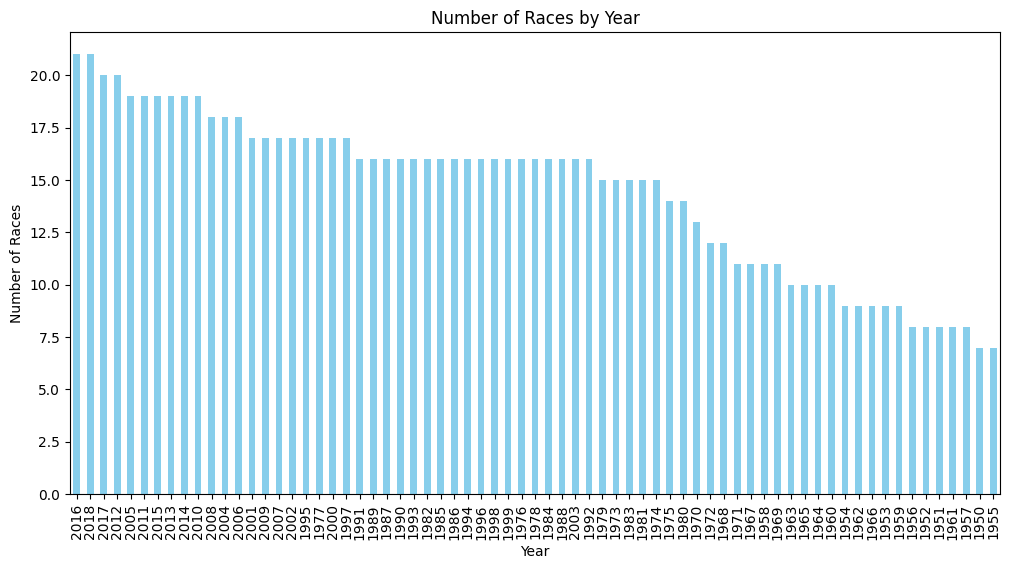

In [ ]:
import matplotlib.pyplot as plt

# Group by 'year' and count the number of races
season_race_count = races.groupby('year')['raceId'].count().sort_values(ascending=False)

# Plotting the distribution of races by season
plt.figure(figsize=(12, 6))
season_race_count.plot(kind='bar', color='skyblue')
plt.title('Number of Races by Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(rotation=90)
plt.show()


#Which constructors have won the most number of championships?

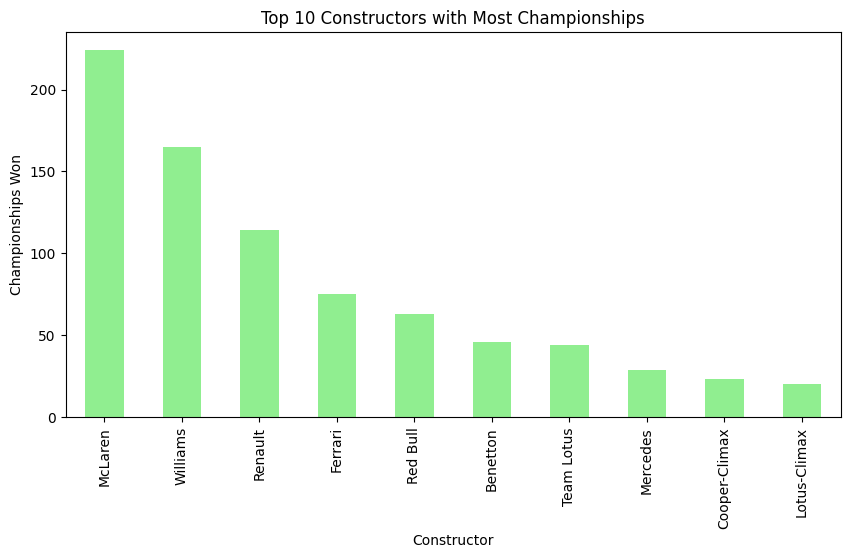

In [ ]:
# Group by constructor and count the championships (position 1 indicates a championship win)
constructor_championships = constructor_standings.groupby('constructorId')['position'].apply(lambda x: (x == 1).sum()).sort_values(ascending=False)

# Get the top 10 constructors
top_10_constructors = constructor_championships.head(10)

# Get the corresponding constructor names for the top 10
top_10_constructors_info = constructors[constructors['constructorId'].isin(top_10_constructors.index)]

# Plot the constructors with the most championships
plt.figure(figsize=(10, 5))
top_10_constructors.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Constructors with Most Championships')
plt.xlabel('Constructor')
plt.ylabel('Championships Won')
plt.xticks(ticks=range(10), labels=top_10_constructors_info['name'], rotation=90)
plt.show()


#What is the distribution of driver race positions across the seasons?

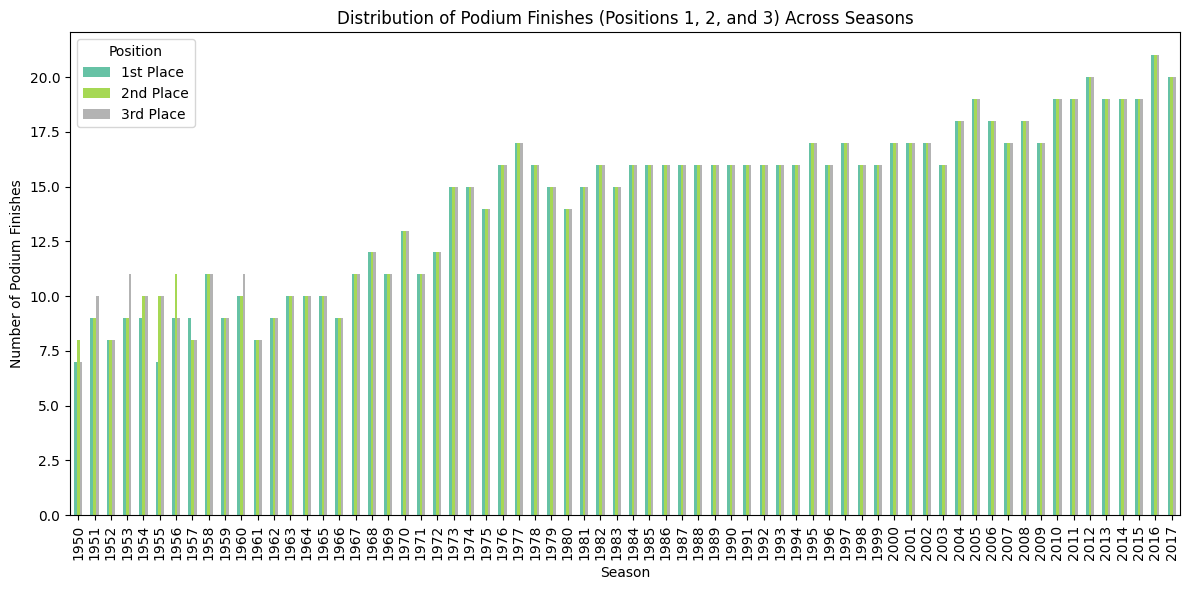

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for podium finishes (positions 1, 2, or 3)
podium_finishers = results[results['positionOrder'].isin([1, 2, 3])]

# Merge podium finishers with the race year
podium_finishers_with_season = pd.merge(podium_finishers, races[['raceId', 'year']], on='raceId')

# Count podium finishes (positions 1, 2, and 3) by year
podium_count_by_year = podium_finishers_with_season.groupby(['year', 'positionOrder']).size().unstack(fill_value=0)

# Plotting the distribution of podium finishes by season
podium_count_by_year.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set2')

plt.title('Distribution of Podium Finishes (Positions 1, 2, and 3) Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Podium Finishes')
plt.xticks(rotation=90)
plt.legend(title='Position', labels=['1st Place', '2nd Place', '3rd Place'])
plt.tight_layout()
plt.show()


#How many pit stops did drivers make on average per race?

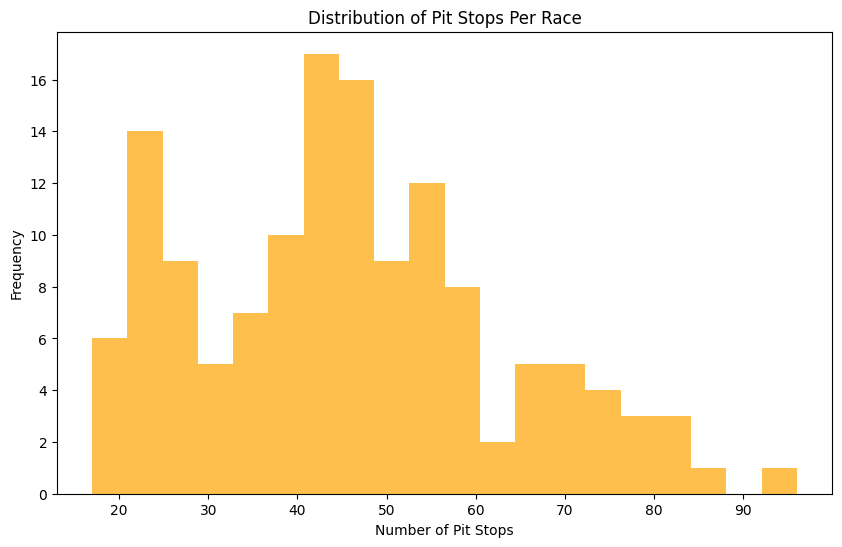

In [ ]:
import matplotlib.pyplot as plt

# Group by raceId and count the number of pit stops for each race
pit_stop_count_per_race = pit_stops.groupby('raceId')['stop'].count()

# Plotting the distribution of pit stops per race
plt.figure(figsize=(10, 6))
pit_stop_count_per_race.plot(kind='hist', bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Pit Stops Per Race')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Frequency')
plt.show()


#Which drivers have the highest number of podium finishes (Top 3 positions)?

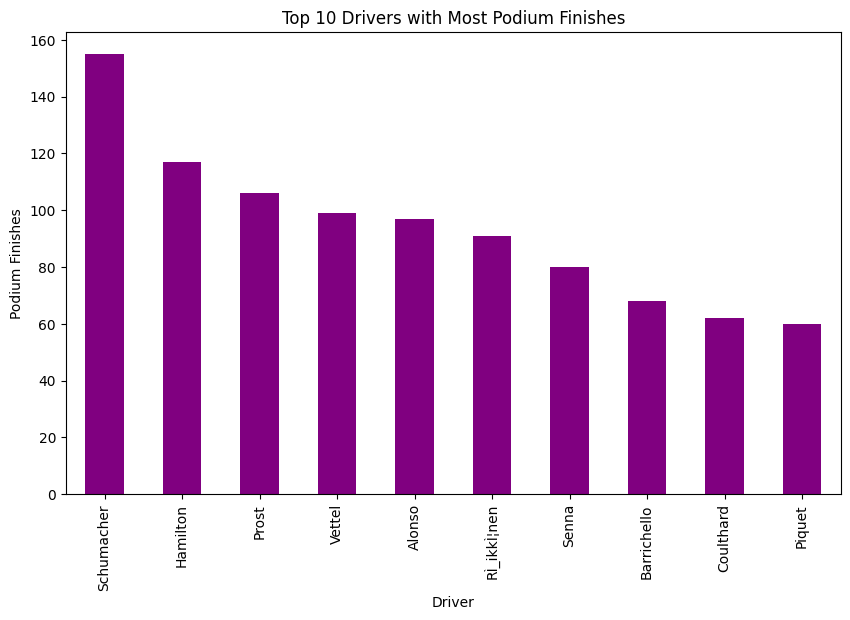

In [ ]:
# Filter results for podium finishes (positionOrder 1, 2, or 3)
podium_finishers = results[results['positionOrder'].isin([1, 2, 3])]

# Group by driver and count podium finishes
podium_counts = podium_finishers.groupby('driverId')['positionOrder'].count().sort_values(ascending=False)

# Get driver names
top_podium_drivers = drivers[drivers['driverId'].isin(podium_counts.index)]

# Plotting the top 10 drivers with the most podium finishes
plt.figure(figsize=(10, 6))
top_10_podium_drivers = podium_counts.head(10)
top_podium_driver_names = top_podium_drivers.set_index('driverId').loc[top_10_podium_drivers.index, 'surname']
top_10_podium_drivers.plot(kind='bar', color='purple')
plt.title('Top 10 Drivers with Most Podium Finishes')
plt.xlabel('Driver')
plt.ylabel('Podium Finishes')
plt.xticks(ticks=range(10), labels=top_podium_driver_names, rotation=90)
plt.show()


#How did lap times vary across different tracks?

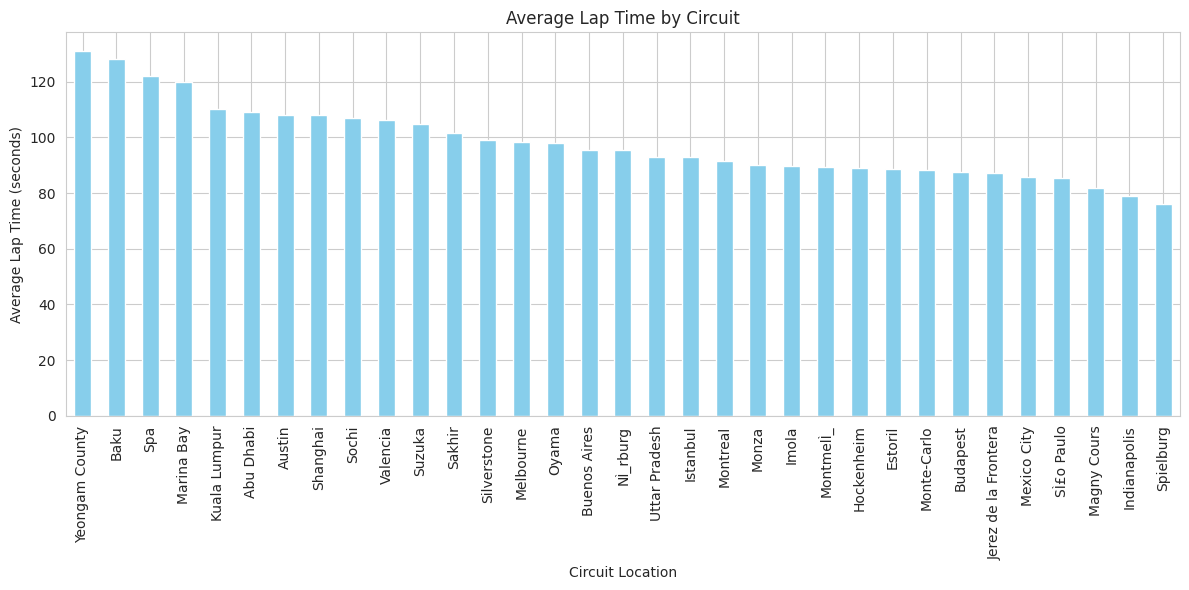

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Merge lapTimes with races to get the circuitId
lap_times_with_races = pd.merge(lap_times, races[['raceId', 'circuitId']], on='raceId')

# Step 2: Merge the result with circuits to get circuit information
lap_times_with_circuits = pd.merge(lap_times_with_races, circuits[['circuitId', 'location', 'name']], on='circuitId')

# Step 3: Calculate the average lap time for each circuit
lap_times_with_circuits['lap_time_seconds'] = lap_times_with_circuits['milliseconds'] / 1000  # Convert to seconds
avg_lap_time_per_circuit = lap_times_with_circuits.groupby('location')['lap_time_seconds'].mean()

# Sort the results to make the plot more readable
avg_lap_time_per_circuit = avg_lap_time_per_circuit.sort_values(ascending=False)

# Plotting the average lap time per circuit
plt.figure(figsize=(12, 6))
avg_lap_time_per_circuit.plot(kind='bar', color='skyblue')
plt.title('Average Lap Time by Circuit')
plt.xlabel('Circuit Location')
plt.ylabel('Average Lap Time (seconds)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#Summary
* In this analysis, we worked with various F1 racing datasets that provided detailed information about races, circuits, drivers, and constructors. The first step involved cleaning and preparing the data, which included fixing column names, handling missing values, and ensuring that all the datasets were in the correct format for analysis. We merged the lapTimes dataset with both the races and circuits datasets using common columns like raceId and circuitId to enrich the lap times with circuit information.

* We then explored key aspects of the data, such as the distribution of podium finishes, the average number of pit stops per race, and how constructor performance changed over time. For instance, we calculated the average lap time for each circuit, providing insights into which tracks had faster or slower lap times. We also visualized the performance of constructors across different seasons, helping us identify patterns and trends in their success.

* By merging and cleaning the data, we were able to generate insightful visualizations and analysis that gave a clearer understanding of various F1 race dynamics, from driver and constructor performances to circuit characteristics.